In [43]:
import pandas as pd
import os

%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [44]:
pd.options.display.float_format = '{:0,.0f}'.format

In [45]:
# Relative path between notebooks and goruped output directories
relative_path = '../../../outputs/grouped'

# VMT

In [46]:
df = pd.read_csv(os.path.join(relative_path,'net_summary.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
dfplot = pd.DataFrame(df_dict[i][df_dict[i]['metric']=='vmt'].groupby('facility_type').sum()['value'] for i in df_dict.keys()).T
dfplot.columns=[i for i in df_dict.keys()]
dfplot.loc['total'] = dfplot.sum()
dfplot

,soundcast,soundcast_base
arterial,"35,440,741","35,440,741"
connectors,"5,598,228","5,598,228"
highway,"41,824,463","41,824,463"
total,"82,863,433","82,863,433"


## VMT per Person

In [47]:
pd.options.display.float_format = '{:0,.2f}'.format

df = pd.read_csv(os.path.join(relative_path,'agg_measures.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
df[df['description'] == 'VMT per Person'][['source','value']].reset_index(drop=True)

,source,value
0,soundcast,17.19
1,survey,17.44
2,soundcast_base,17.19


## Trips per Person

In [48]:
df[df['description'] == 'Average Trips per Person'][['source','value']].reset_index(drop=True)

,source,value
0,soundcast,4.46
1,survey,4.54
2,soundcast_base,4.46


## Average Trip Length

In [49]:
df = pd.read_csv(os.path.join(relative_path,'trips.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]

In [50]:
dfplot = pd.DataFrame([(df_dict[i]['travdist']*df_dict[i]['trexpfac']).sum()/df_dict[i]['trexpfac'].sum() for i in df_dict.keys()])
dfplot.columns = ['Average Trip Length']
dfplot['source'] = [i for i in df_dict.keys()]
dfplot

,Average Trip Length,source
0,5.37,soundcast
1,5.87,survey
2,5.37,soundcast_base


## Trip Mode Share

Axes(0.125,0.125;0.775x0.775)


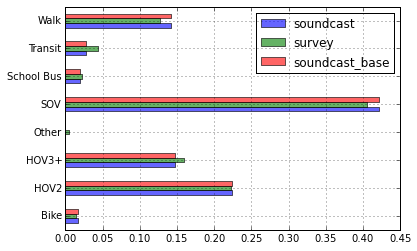

In [51]:
dfplot = pd.DataFrame([df_dict[i].groupby('mode').sum()['trexpfac']/df_dict[i].sum()['trexpfac'] for i in df_dict.keys()]).T
dfplot.columns = df_dict.keys()
print(dfplot.plot(kind='barh', alpha=0.6))

In [52]:
print dfplot

            soundcast  survey  soundcast_base
Bike             0.02    0.01            0.02
HOV2             0.22    0.22            0.22
HOV3+            0.15    0.16            0.15
Other             nan    0.00             nan
SOV              0.42    0.41            0.42
School Bus       0.02    0.02            0.02
Transit          0.03    0.04            0.03
Walk             0.14    0.13            0.14


## Tour Mode Share

Axes(0.125,0.125;0.775x0.775)


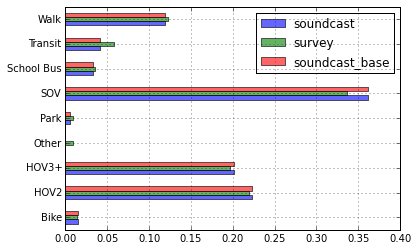

In [53]:
df = pd.read_csv(os.path.join(relative_path,'tours_tlvdest.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
dfplot = pd.DataFrame([df_dict[i].groupby('tmodetp').sum()['toexpfac']/df_dict[i].sum()['toexpfac'] for i in df_dict.keys()]).T
dfplot.columns = df_dict.keys()
print(dfplot.plot(kind='barh', alpha=0.6))

In [54]:
print dfplot

            soundcast  survey  soundcast_base
Bike             0.01    0.01            0.01
HOV2             0.22    0.22            0.22
HOV3+            0.20    0.20            0.20
Other             nan    0.01             nan
Park             0.01    0.01            0.01
SOV              0.36    0.34            0.36
School Bus       0.03    0.04            0.03
Transit          0.04    0.06            0.04
Walk             0.12    0.12            0.12


## Tour Purpose Distribution

Axes(0.125,0.125;0.775x0.775)


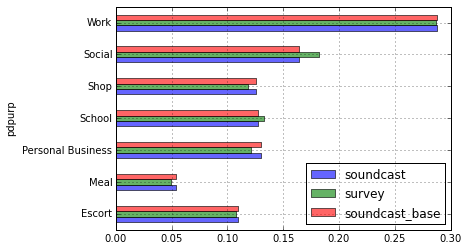

In [55]:
# Reformat to plot
dfplot = pd.DataFrame([df_dict[i].groupby('pdpurp').sum()['toexpfac']/df_dict[i].sum()['toexpfac'] for i in df_dict.keys()]).T
dfplot.columns = df_dict.keys()
print(dfplot.plot(kind='barh', alpha=0.6))

In [56]:
print dfplot

                   soundcast  survey  soundcast_base
pdpurp                                              
Escort                  0.11    0.11            0.11
Meal                    0.05    0.05            0.05
Personal Business       0.13    0.12            0.13
School                  0.13    0.13            0.13
Shop                    0.13    0.12            0.13
Social                  0.16    0.18            0.16
Work                    0.29    0.29            0.29


## Tour Departure Times

## Screenlines

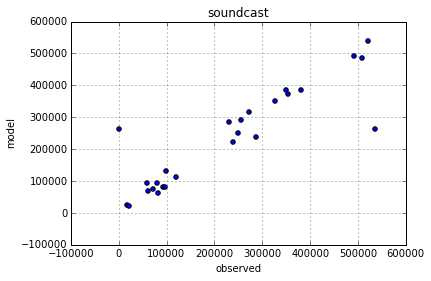

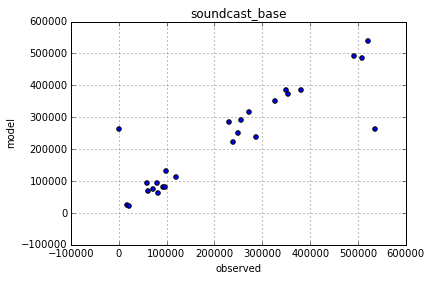

In [57]:
df = pd.read_csv(os.path.join(relative_path,'screenlines.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
for source in df_dict.keys():
    df_dict[source][['model','observed']].plot(kind='scatter', x='observed',y='model', title=source)

## Traffic Counts

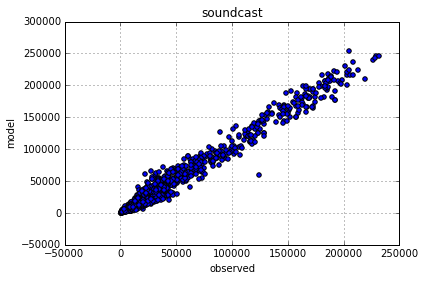

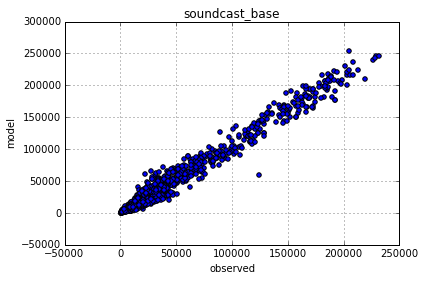

In [58]:
df = pd.read_csv(os.path.join(relative_path,'traffic_counts.csv'))
# Save results by source as seperate df
df_dict = {}
for source in df.groupby('source').count().index.tolist():
    df_dict[source] = df[df['source'] == source]
    
for source in df_dict.keys():
    df_dict[source][['model','observed']].plot(kind='scatter', x='observed',y='model', title=source)